## Import library

In [1]:
import cv2
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dropout, Dense
from keras.layers.convolutional import MaxPooling2D
from matplotlib import pyplot as plt
from keras.utils import np_utils
%matplotlib inline

Using TensorFlow backend.


## Load images

In [2]:
csv_path = 'shapes/summary.csv'
dataset = pd.read_csv(csv_path)
dataset.head()

,image,label
0,shapes/square/2189.png,square
1,shapes/square/3166.png,square
2,shapes/square/3049.png,square
3,shapes/square/3676.png,square
4,shapes/square/2767.png,square


In [3]:
img_dataset = np.array(dataset)
img_dataset[:5]

array([['shapes/square/2189.png', 'square'],
       ['shapes/square/3166.png', 'square'],
       ['shapes/square/3049.png', 'square'],
       ['shapes/square/3676.png', 'square'],
       ['shapes/square/2767.png', 'square']], dtype=object)

## Check images

['shapes/square/2189.png' 'square']


(200, 200, 3)

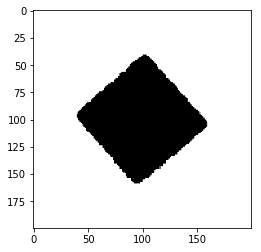

In [4]:
print(img_dataset[0])

frame = cv2.imread(img_dataset[0][0])

plt.imshow(frame)

frame.shape


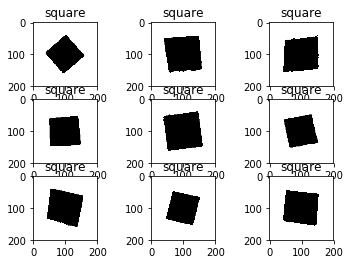

In [5]:
from math import sqrt
n = 9
for i in range(n):
    data = cv2.imread(img_dataset[i][0])
    plt.subplot(sqrt(n),sqrt(n),i+1)
    plt.imshow(data)
    plt.title(img_dataset[i][1])
plt.show()

## train test split

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dataset[['image']],dataset[['label']],test_size=0.2,random_state = 42)
print(x_train.shape,y_train.shape)

(11976, 1) (11976, 1)


## normalize

In [7]:
def convertToImg(x_train):
    x_train_arr = x_train.values
    x_train = np.zeros((x_train_arr.shape[0],28,28))
    for i in range(x_train_arr.shape[0]):
        x_train[i] = cv2.resize(cv2.imread(x_train_arr[i][0],cv2.IMREAD_GRAYSCALE),(28,28))
    print("shape=",x_train.shape)
    return x_train

In [8]:
x_train = convertToImg(x_train)
x_test = convertToImg(x_test)

shape= (11976, 28, 28)
shape= (2994, 28, 28)


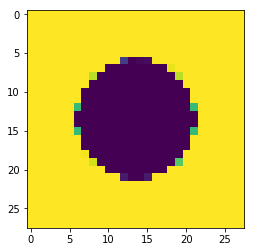

In [9]:
plt.imshow(x_train[1000])

In [10]:
#noramlize 
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
print("x_train shape = ",x_train.shape)
print("x_test shape = ",x_test.shape)

x_train = x_train/255
x_test = x_test/255

x_train shape =  (11976, 28, 28, 1)
x_test shape =  (2994, 28, 28, 1)


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
number_of_classes = y_train.shape[1] 
number_of_classes


#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)

(11976, 4)


/home/shanu/Documents/PyCharmProjects/test/venv/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


4

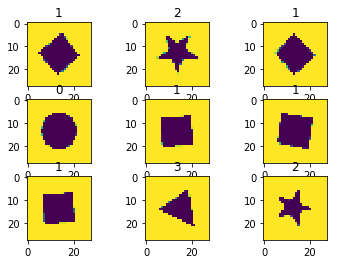

In [12]:
from math import sqrt
n = 9
for i in range(n):
    plt.subplot(sqrt(n),sqrt(n),i+1)
    plt.imshow(x_train[i].reshape(28,28))
    plt.title(np.argmax(y_train[i]))
plt.show()

## define model

In [13]:
def baseline_model():
    #crete model
    model = Sequential()
    model.add(Conv2D(32,(5,5),input_shape = (28,28,1),activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(number_of_classes,activation='softmax'))
    
    #compile model
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
    
    return model

## evaluate model

In [14]:
model = baseline_model()
model.summary()

model.fit(x_train,y_train,validation_data =(x_test,y_test),epochs=10,batch_size = 100,verbose = 2)

scores = model.evaluate(x_test,y_test,verbose = 0)

scores

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)      

[0.00015383114959032423, 1.0]

## predict

In [36]:
np.argmax(model.predict(x_train[2:3]))

1

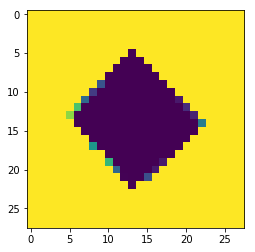

In [37]:
plt.imshow(x_train[2].reshape(28,28))

In [38]:
def validInput(my_img,gray=True): ### gray scscle input
    if not gray:
        my_img = cv2.cvtColor(my_img,cv2.COLOR_BGR2GRAY)
    my_img = cv2.resize(my_img,(28,28))
    my_img = my_img.reshape(1,28,28,1).astype('float32') /255
    return my_img

def getClass(res):
    my_class = {
        0:'circle',
        1:'square',
        2:'star',
        3:'triangle'
    }
    return my_class[np.argmax(res)]

In [39]:
my_img = cv2.imread('shapes/triangle/0.png',cv2.IMREAD_GRAYSCALE)

my_img = validInput(my_img)

res = model.predict(my_img)

print(getClass(res))

triangle


In [40]:
my_img = cv2.imread('shapes/triangle/0.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow("frame",my_img)
cv2.waitKey()
cv2.destroyAllWindows()

## Video

In [55]:
def recognize(frame):
    img = validInput(frame,False)
    res = getClass(model.predict(img))
    return res

In [56]:
import time, threading

video = 'test.mp4'
cap = cv2.VideoCapture(video)
# _,frame = cap.read()
# td = threading.Thread(target = recognize,args=(frame,))
# td.start()
while cap.isOpened():
    ret,frame = cap.read()
    if not ret:
        break
    frame = cv2.resize(frame,(640,480))
    my_frame = frame[:,180:450]
    #print("size",frame.shape)
    res = recognize(my_frame)
    cv2.putText(frame,res,(150,150),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)
    cv2.imshow("Test",frame)
    k = cv2.waitKey(1)
    #time.sleep(0.1)
    if k==27:
        break
cap.release()
cv2.destroyAllWindows()